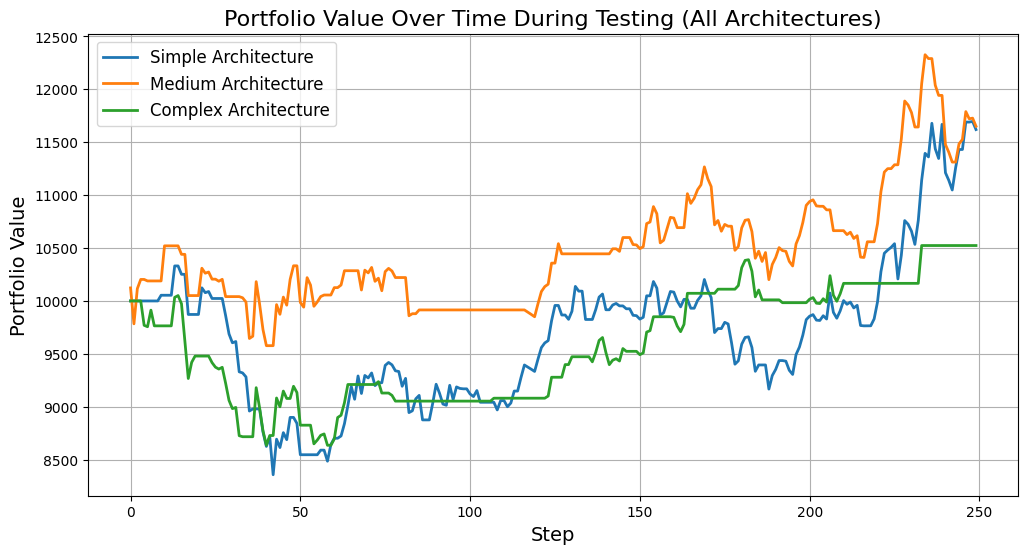

GIF saved to: dqn_results\portfolio_value_comparison.gif


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

results_folder = "dqn_results"
architectures = ["simple", "medium", "complex"]

results = {}

for arch in architectures:
    file_path = os.path.join(results_folder, f"dqn_test_logs_{arch}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        results[arch] = df['Portfolio Value'].tolist()
    else:
        print(f"Warning: {file_path} does not exist. Skipping.")

plt.figure(figsize=(12, 6))
for arch, portfolios in results.items():
    plt.plot(range(len(portfolios)), portfolios, label=f"{arch.capitalize()} Architecture", linewidth=2)

plt.title("Portfolio Value Over Time During Testing (All Architectures)", fontsize=16)
plt.xlabel("Step", fontsize=14)
plt.ylabel("Portfolio Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig(os.path.join(results_folder, "portfolio_value_comparison.png"))
plt.show()

def create_gif(results, architectures, save_path):
    fig, ax = plt.subplots(figsize=(12, 6))
    lines = {}
    for arch in architectures:
        lines[arch], = ax.plot([], [], label=f"{arch.capitalize()} Architecture", linewidth=2)
    ax.set_title("Portfolio Value Over Time During Testing (All Architectures)", fontsize=16)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel("Portfolio Value", fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True)

    def init():
        ax.set_xlim(0, max(len(v) for v in results.values()))
        ax.set_ylim(0, max(max(v) for v in results.values()) * 1.1)
        return lines.values()

    def update(frame):
        for arch in architectures:
            if frame < len(results[arch]):
                lines[arch].set_data(range(frame + 1), results[arch][:frame + 1])
        return lines.values()

    anim = FuncAnimation(fig, update, frames=max(len(v) for v in results.values()), init_func=init, blit=True)
    anim.save(save_path, writer="pillow")
    plt.close(fig)
    print(f"GIF saved to: {save_path}")

try:
    from PIL import Image
except ImportError:
    print("The 'pillow' library is required for GIF creation. Install it using 'pip install pillow'.")

# Create and save the GIF
gif_path = os.path.join(results_folder, "portfolio_value_comparison.gif")
create_gif(results, architectures, gif_path)